## PLANEJAMENTO E CONTROLE DA EXPANSÃO TERRITORIAL URBANA NA IMPLEMENTAÇÃO DO PLANO DIRETOR

### **Capítulo 2** | Planejamento e regulação da expansão territorial urbana em Plano Diretores: estudo de caso em São Carlos, SP

##### **Autoria:** Isabel Cristina Nunes de Sousa
---

### **Pacotes**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from watermark import watermark

%load_ext watermark

In [2]:
%watermark --watermark

Watermark: 2.3.1



In [3]:
%watermark --iversions

matplotlib: 3.7.1
pandas    : 2.0.1



In [4]:
print(watermark())

Last updated: 2023-06-21T17:20:52.524088-03:00

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.14.0

Compiler    : MSC v.1934 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



---

### **Funções**

In [5]:
def classifica(df, col):

  """Classifica graus de atendimento"""

  atendimento = []

  for value in df[col]:
    
    if value == 0:
      atendimento.append('Nulo')
    elif 0 < value <= 2:
      atendimento.append('Muito baixo')
    elif 2 < value <= 4:
      atendimento.append('Baixo')
    elif 4 < value <= 7:
      atendimento.append('Médio')
    elif 7 < value <= 9:
      atendimento.append('Alto')
    elif 9 < value < 10:
      atendimento.append('Muito alto')
    else:
      atendimento.append('Integral')

  return atendimento

In [6]:
def dot_plot(df, col, title, figname):

  """Cria Cleveland dot plot"""

  # extrai valores de interesse para o gráfico
  atendimento_2005 = df.query('PD == "2005"')['atendimento']
  atendimento_2016 = df.query('PD == "2016"')['atendimento']

  if col == 'Itens':

    # extrai valores de interesse para o gráfico
    pontos_2005 = df.query('PD == "2005"')['escala']
    pontos_2016 = df.query('PD == "2016"')['escala']

    # rótulos do eixo y
    # labels = df['Itens'].unique()
    labels = ['Ampliação do\nperímetro urbano', 
              'Apreciação de propostas de\nalteração do perímetro urbano', 
              'Fragmentação da\nmancha urbana', 
              'Identificação e delimitação\nde vazios urbanos', 
              'Desestímulo à\nretenção especulativa', 'Zeis em\nvazios urbanos', 
              'Ocupação de área\nambientalmente frágeis', 'Uso misto do solo', 
              'Incentivo/restrição ao\nadensamento']

    # tamanho, resolução e layout da figura
    fig, ax = plt.subplots(figsize=(8.3, 11.7), dpi=300, layout="constrained")

  else:

    # extrai valores de interesse para o gráfico
    pontos_2005 = df.query('PD == "2005"')['media']
    pontos_2016 = df.query('PD == "2016"')['media']

    # rótulos eixo y
    # labels = df['Eixos'].unique()
    labels = ['Adensamento\nadequado', 'Combate aos\nvazios urbanos', 
              'Condicionamento do\ncrescimento\nhorizontal da cidade']
    
    # tamanho, resolução e layout da figura
    fig, ax = plt.subplots(figsize=(8.3, 11.7), dpi=300, layout="constrained")
  
  faixa = range(1, len(pontos_2005.index) + 1)
  
  # pontos e linhas de interligação
  ax.hlines(y=faixa, xmin=pontos_2005, xmax=pontos_2016, color='#8f9c9a', lw=1.5)
  ax.scatter(pontos_2005, faixa, color='#fdb462', s=75, label='PD 2005', zorder=3)
  ax.scatter(pontos_2016, faixa, color='#80b1d3', s=75, label='PD 2016', zorder=3)

  # remove bordas superior e direita
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  # adiciona rótulos para os pontos e posiciona legendas
  for y, x1, x2, label1, label2 in zip(faixa, pontos_2005,pontos_2016, 
                                       atendimento_2005, atendimento_2016):
    if col == 'Itens':
      ax.text(x1+.3, y, label1, color='black', va='top')
      ax.text(x2+.5, y, label2, color='black', va='bottom')
      ax.legend(loc='upper left')

    else:
      ax.text(x1+.08, y, label1, color='black', va='top')
      ax.text(x2+.08, y, label2, color='black', va='bottom')
      ax.legend(loc='upper right')
  
  # título, subtítulo (eixo x) e eixo y
  ax.set_title(title, fontweight='bold')
  ax.xaxis.set_label_position('top')
  ax.set_xlabel('Planos Diretores de 2005 e 2016', color='grey', style='italic', fontsize=11)
  ax.set_yticks(faixa, labels, fontsize=12)
  
  # adiciona gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

  # salva e exibe figura
  plt.savefig(f'figuras/{figname}.png')
  plt.show()

---

### **Bases de dados**

In [7]:
# Carrega bases de dados de 2005 e 2016
df2005 = pd.read_excel('dados/avaliacao_pd_2005.ods', engine='odf')
df2016 = pd.read_excel('dados/avaliacao_pd_2016.ods', engine='odf')

# Adiciona coluna com os respectivos anos dos planos diretores (como string)
df2005['PD'] = '2005'
df2016['PD'] = '2016'

# Concatena ambas as bases em um mesmo DataFrame
pds = pd.concat([df2005, df2016])

# Exibe DataFrame concatenado
pds

,Eixos,Itens,i,ii,iii,iv,v,vi,vii,PD
0,Condicionamento do crescimento horizontal da c...,Ampliação do perímetro urbano,0.00,0.000,0.00,0.50,NaN,NaN,NaN,2005
1,Condicionamento do crescimento horizontal da c...,Apreciação de propostas de alteração do períme...,0.50,0.500,0.00,0.00,NaN,NaN,NaN,2005
2,Condicionamento do crescimento horizontal da c...,Fragmentação da mancha urbana,0.00,0.000,0.00,NaN,NaN,NaN,NaN,2005
3,Combate aos vazios urbanos,Identificação e delimitação de vazios urbanos,0.50,0.750,0.75,NaN,NaN,NaN,NaN,2005
4,Combate aos vazios urbanos,Desestímulo à retenção especulativa,0.25,0.250,0.25,0.25,0.0,0.25,0.0,2005
5,Combate aos vazios urbanos,ZEIS em vazios urbanos,0.75,0.625,NaN,NaN,NaN,NaN,NaN,2005
6,Adensamento adequado,Ocupação de áreas ambientalmente frágeis,1.00,1.000,NaN,NaN,NaN,NaN,NaN,2005
7,Adensamento adequado,Uso misto do solo,0.75,0.000,NaN,NaN,NaN,NaN,NaN,2005
8,Adensamento adequado,Incentivo/restrição ao adensamento,0.50,0.500,0.50,0.25,NaN,NaN,NaN,2005
0,Condicionamento do crescimento horizontal da c...,Ampliação do perímetro urbano,0.00,0.000,0.00,0.50,NaN,NaN,NaN,2016


In [8]:
# Cria coluna 'pontos' (somatório dos subitens) e 'escala' (conversão de 0-2 para 0-10)
pds = pds.assign(pontos = lambda x: x.sum(axis=1, numeric_only=True), 
                 escala=lambda y: (round(y['pontos'] / 2, 2))*10)

# Cria coluna 'atendimento' com a classificação das pontuações
pds['atendimento'] = classifica(df=pds, col='escala')

# Exibe DataFrame com novas colunas
pds

,Eixos,Itens,i,ii,iii,iv,v,vi,vii,PD,pontos,escala,atendimento
0,Condicionamento do crescimento horizontal da c...,Ampliação do perímetro urbano,0.00,0.000,0.00,0.50,NaN,NaN,NaN,2005,0.500,2.5,Baixo
1,Condicionamento do crescimento horizontal da c...,Apreciação de propostas de alteração do períme...,0.50,0.500,0.00,0.00,NaN,NaN,NaN,2005,1.000,5.0,Médio
2,Condicionamento do crescimento horizontal da c...,Fragmentação da mancha urbana,0.00,0.000,0.00,NaN,NaN,NaN,NaN,2005,0.000,0.0,Nulo
3,Combate aos vazios urbanos,Identificação e delimitação de vazios urbanos,0.50,0.750,0.75,NaN,NaN,NaN,NaN,2005,2.000,10.0,Integral
4,Combate aos vazios urbanos,Desestímulo à retenção especulativa,0.25,0.250,0.25,0.25,0.0,0.25,0.0,2005,1.250,6.2,Médio
5,Combate aos vazios urbanos,ZEIS em vazios urbanos,0.75,0.625,NaN,NaN,NaN,NaN,NaN,2005,1.375,6.9,Médio
6,Adensamento adequado,Ocupação de áreas ambientalmente frágeis,1.00,1.000,NaN,NaN,NaN,NaN,NaN,2005,2.000,10.0,Integral
7,Adensamento adequado,Uso misto do solo,0.75,0.000,NaN,NaN,NaN,NaN,NaN,2005,0.750,3.8,Baixo
8,Adensamento adequado,Incentivo/restrição ao adensamento,0.50,0.500,0.50,0.25,NaN,NaN,NaN,2005,1.750,8.8,Alto
0,Condicionamento do crescimento horizontal da c...,Ampliação do perímetro urbano,0.00,0.000,0.00,0.50,NaN,NaN,NaN,2016,0.500,2.5,Baixo


In [9]:
# Cria cópia do DataFrame, apenas com colunas de interesse
pds_itens = pds[['Itens', 'PD', 'escala', 'atendimento']].copy()

# Agrupa por eixos e plano diretor, calculando a média da escala e classificando-a
pds_eixos = pds.groupby(['Eixos', 'PD']).agg(media=('escala', 'mean')).round(1).reset_index()
pds_eixos['atendimento'] = classifica(df=pds_eixos, col='media')

# Exibe DataFrames agrupados
print(f'Média das pontuações por Itens:\n {pds_itens}')
print()
print(f'Média das pontuações por Eixos:\n {pds_eixos}')

Média das pontuações por Itens:
                                                Itens    PD  escala atendimento
0                      Ampliação do perímetro urbano  2005     2.5       Baixo
1  Apreciação de propostas de alteração do períme...  2005     5.0       Médio
2                      Fragmentação da mancha urbana  2005     0.0        Nulo
3      Identificação e delimitação de vazios urbanos  2005    10.0    Integral
4                Desestímulo à retenção especulativa  2005     6.2       Médio
5                             ZEIS em vazios urbanos  2005     6.9       Médio
6           Ocupação de áreas ambientalmente frágeis  2005    10.0    Integral
7                                  Uso misto do solo  2005     3.8       Baixo
8                 Incentivo/restrição ao adensamento  2005     8.8        Alto
0                      Ampliação do perímetro urbano  2016     2.5       Baixo
1  Apreciação de propostas de alteração do períme...  2016    10.0    Integral
2                  

---

### **Visualização dos Dados**

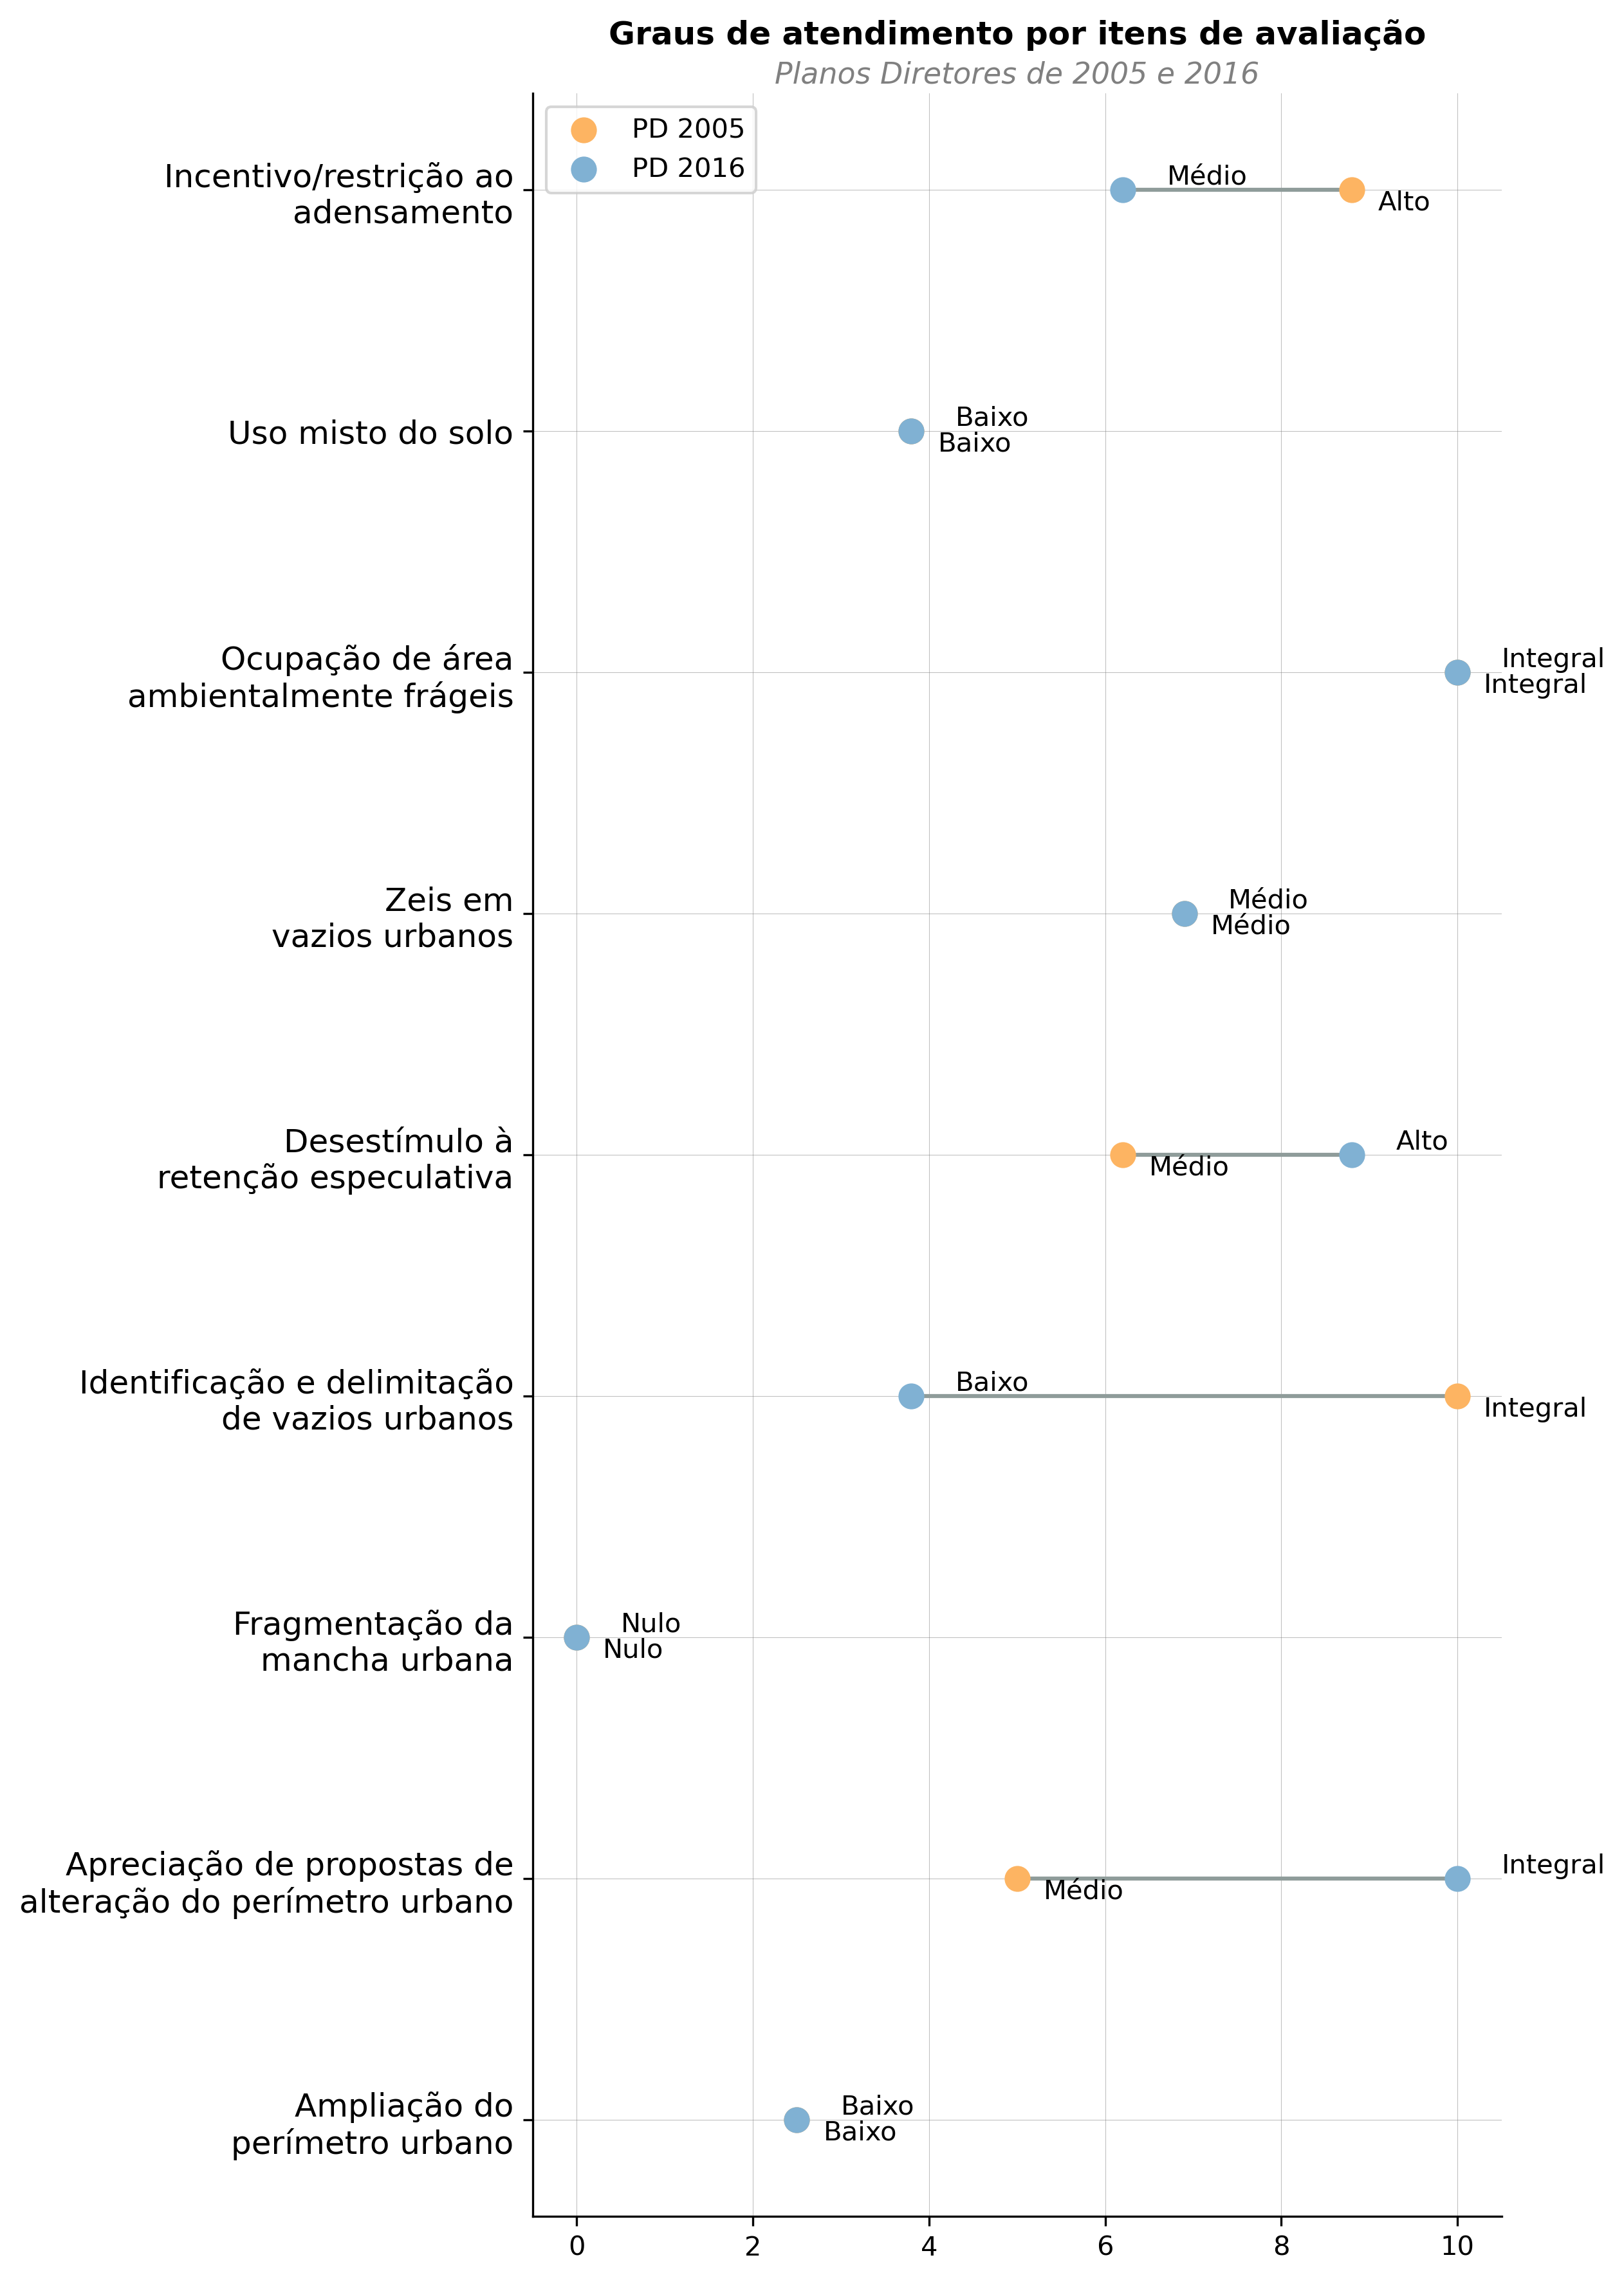

In [10]:
dot_plot(df=pds_itens, col='Itens', title='Graus de atendimento por itens de avaliação', figname='fig_4')

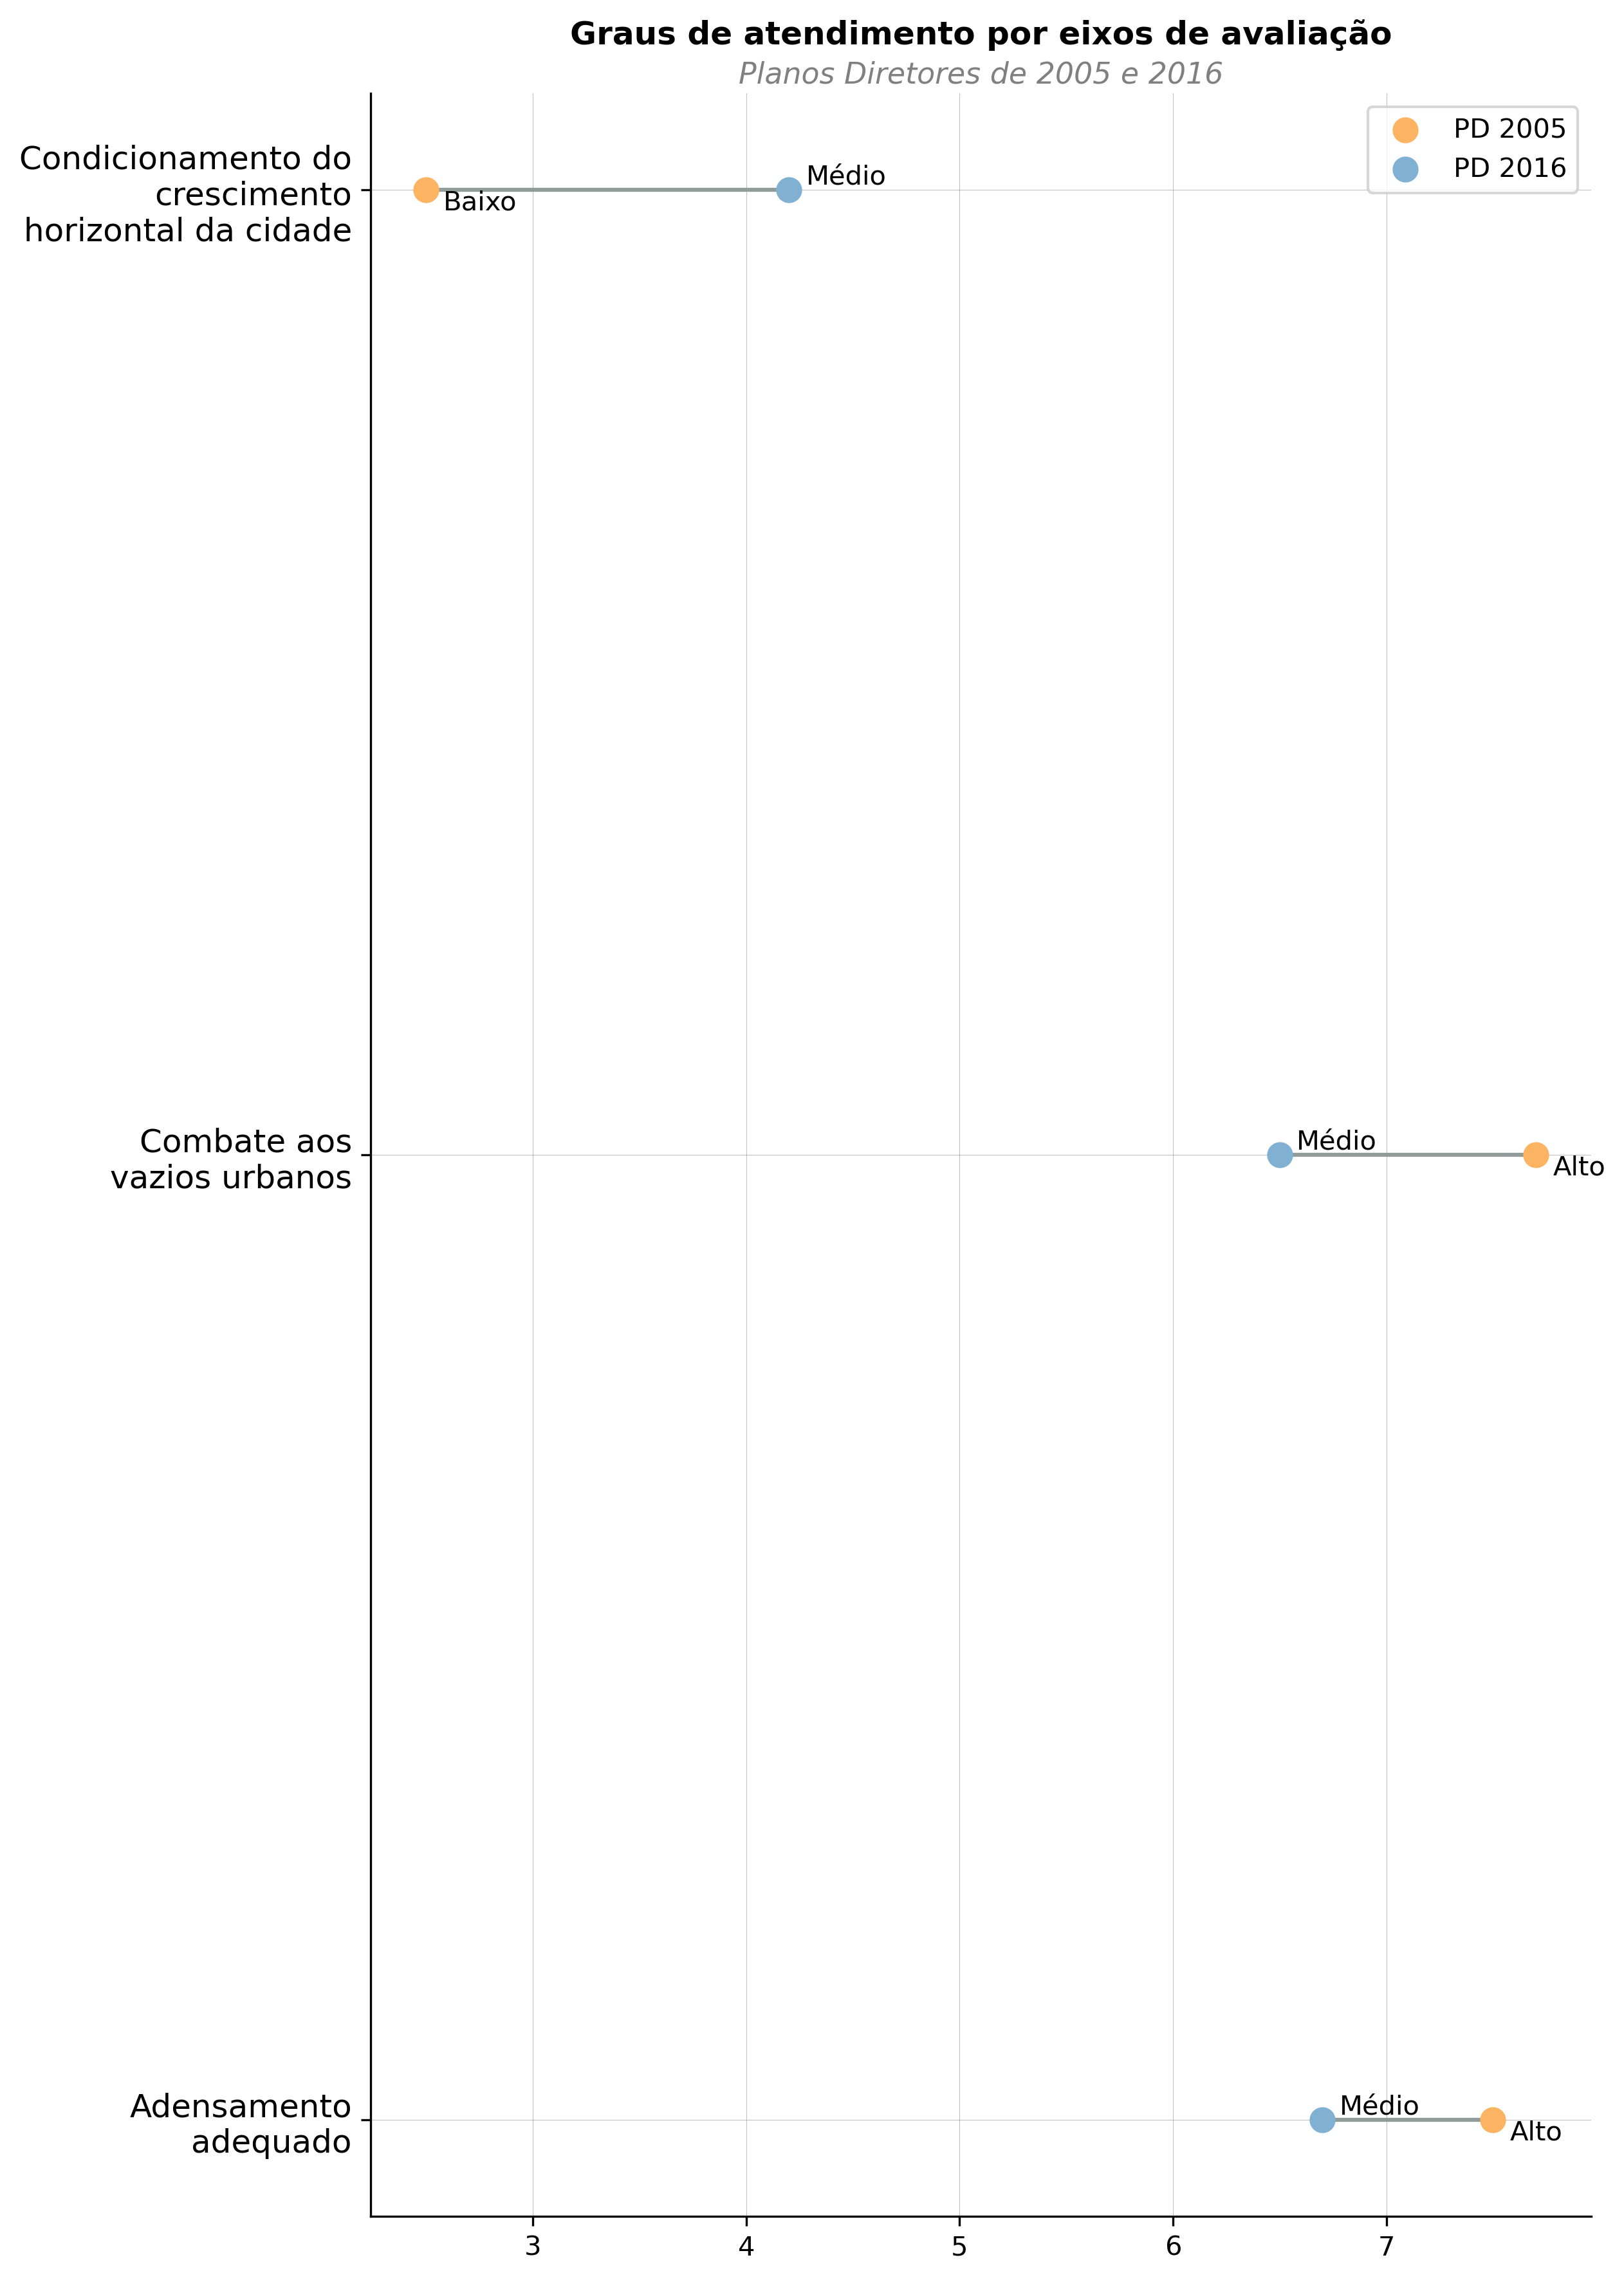

In [11]:
dot_plot(df=pds_eixos, col='Eixos', title='Graus de atendimento por eixos de avaliação', figname='fig_5')

---